In [1]:
from pandas_datareader import data as pdr

import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

from scipy import stats

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as sms

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

## Get Data

In [2]:
goldPx = pdr.get_data_yahoo('GC=F', '2015-01-01', '2020-04-18')
goldPx.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,1199.199951,1182.699951,1199.199951,1183.900024,191.0,1183.900024
2015-01-02,1194.500000,1169.500000,1184.000000,1186.000000,92.0,1186.000000
2015-01-05,1206.900024,1180.099976,1180.300049,1203.900024,138.0,1203.900024
2015-01-06,1220.000000,1203.500000,1203.500000,1219.300049,470.0,1219.300049
2015-01-07,1219.199951,1210.599976,1219.199951,1210.599976,97.0,1210.599976


In [3]:
goldPx.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1336.000000,1336.000000,1336.000000,1336.000000,1.336000e+03,1336.000000
mean,1289.539372,1277.466843,1283.487874,1287.228369,1.406739e+06,1287.228369
std,142.943170,139.044749,140.899038,128.550053,1.282068e+07,128.550053
min,0.000000,0.000000,0.000000,1050.800049,0.000000e+00,1050.800049
25%,1212.499969,1202.375031,1207.074982,1208.325012,3.275000e+01,1208.325012
50%,1273.599976,1264.049988,1268.699951,1269.799988,1.255000e+02,1269.799988
75%,1328.825043,1320.425018,1324.500000,1324.400024,4.647500e+02,1324.400024
max,1788.800049,1736.000000,1780.599976,1769.400024,2.307245e+08,1769.400024


In [4]:
crudeOilPx = pdr.get_data_yahoo('CL=F', '2015-01-01', '2020-04-18')
crudeOilPx.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,54.020000,52.439999,53.869999,53.270000,218557.0,53.270000
2015-01-02,55.110001,52.029999,53.759998,52.689999,233516.0,52.689999
2015-01-05,52.730000,49.680000,52.610001,50.040001,268708.0,50.040001
2015-01-06,50.369999,47.549999,50.000000,47.930000,375782.0,47.930000
2015-01-07,49.310001,46.830002,48.000000,48.650002,451642.0,48.650002


In [5]:
crudeOilPx.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1329.000000,1329.000000,1329.000000,1329.000000,1.329000e+03,1329.000000
mean,53.160128,51.434417,52.329789,52.304906,5.305239e+06,52.304906
std,10.008684,10.189925,10.088357,10.110420,3.977009e+07,10.110420
min,19.770000,17.309999,19.709999,18.120001,9.597900e+04,18.120001
25%,47.349998,45.560001,46.410000,46.349998,4.365130e+05,46.349998
50%,52.900002,51.169998,52.119999,52.119999,5.775150e+05,52.119999
75%,59.720001,58.099998,58.980000,59.020000,7.098700e+05,59.020000
max,76.900002,74.930000,76.180000,76.410004,4.599322e+08,76.410004


In [6]:
DXYPx = pdr.get_data_yahoo('DX-Y.NYB', '2015-01-01', '2020-04-18')
DXYPx.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,90.300003,89.860001,89.930000,90.269997,0.0,90.269997
2015-01-02,91.160004,90.330002,90.360001,91.080002,0.0,91.080002
2015-01-05,91.779999,91.129997,91.129997,91.379997,0.0,91.379997
2015-01-06,91.809998,91.120003,91.379997,91.500000,0.0,91.500000
2015-01-07,92.269997,91.650002,91.750000,91.889999,0.0,91.889999


In [7]:
DXYPx.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1325.000000,1325.000000,1325.000000,1325.000000,1.325000e+03,1325.000000
mean,96.578340,95.963691,96.262642,96.280174,1.757736e+04,96.280174
std,2.748545,2.725282,2.741304,2.742121,4.637906e+05,2.742121
min,89.000000,88.250000,88.570000,88.589996,0.000000e+00,88.589996
25%,94.930000,94.320000,94.629997,94.620003,0.000000e+00,94.620003
50%,96.790001,96.199997,96.510002,96.519997,0.000000e+00,96.519997
75%,98.190002,97.660004,97.940002,97.959999,0.000000e+00,97.959999
max,103.820000,103.029999,103.260002,103.290001,1.429000e+07,103.290001


## Generate Common Dataset Plot over Time

In [8]:
dataset = []
for i in [('Gold', goldPx), ('DXY', DXYPx), ('CrudeOil', crudeOilPx)]:
    dataset += [pd.DataFrame({i[0]: i[1]['Close']})]
    
dataset = pd.concat(dataset,axis=1).dropna()

dataset.head()

,Gold,DXY,CrudeOil
Date,,,
2014-12-31,1183.900024,90.269997,53.270000
2015-01-02,1186.000000,91.080002,52.689999
2015-01-05,1203.900024,91.379997,50.040001
2015-01-06,1219.300049,91.500000,47.930000
2015-01-07,1210.599976,91.889999,48.650002


In [9]:
dataset.describe()

,Gold,DXY,CrudeOil
count,1322.000000,1322.000000,1322.000000
mean,1283.958851,96.282980,52.402035
std,125.044319,2.737386,9.988490
min,1050.800049,88.589996,18.120001
25%,1207.900024,94.620003,46.432500
50%,1267.950012,96.514999,52.139999
75%,1322.775024,97.959999,59.027499
max,1769.400024,103.290001,76.410004


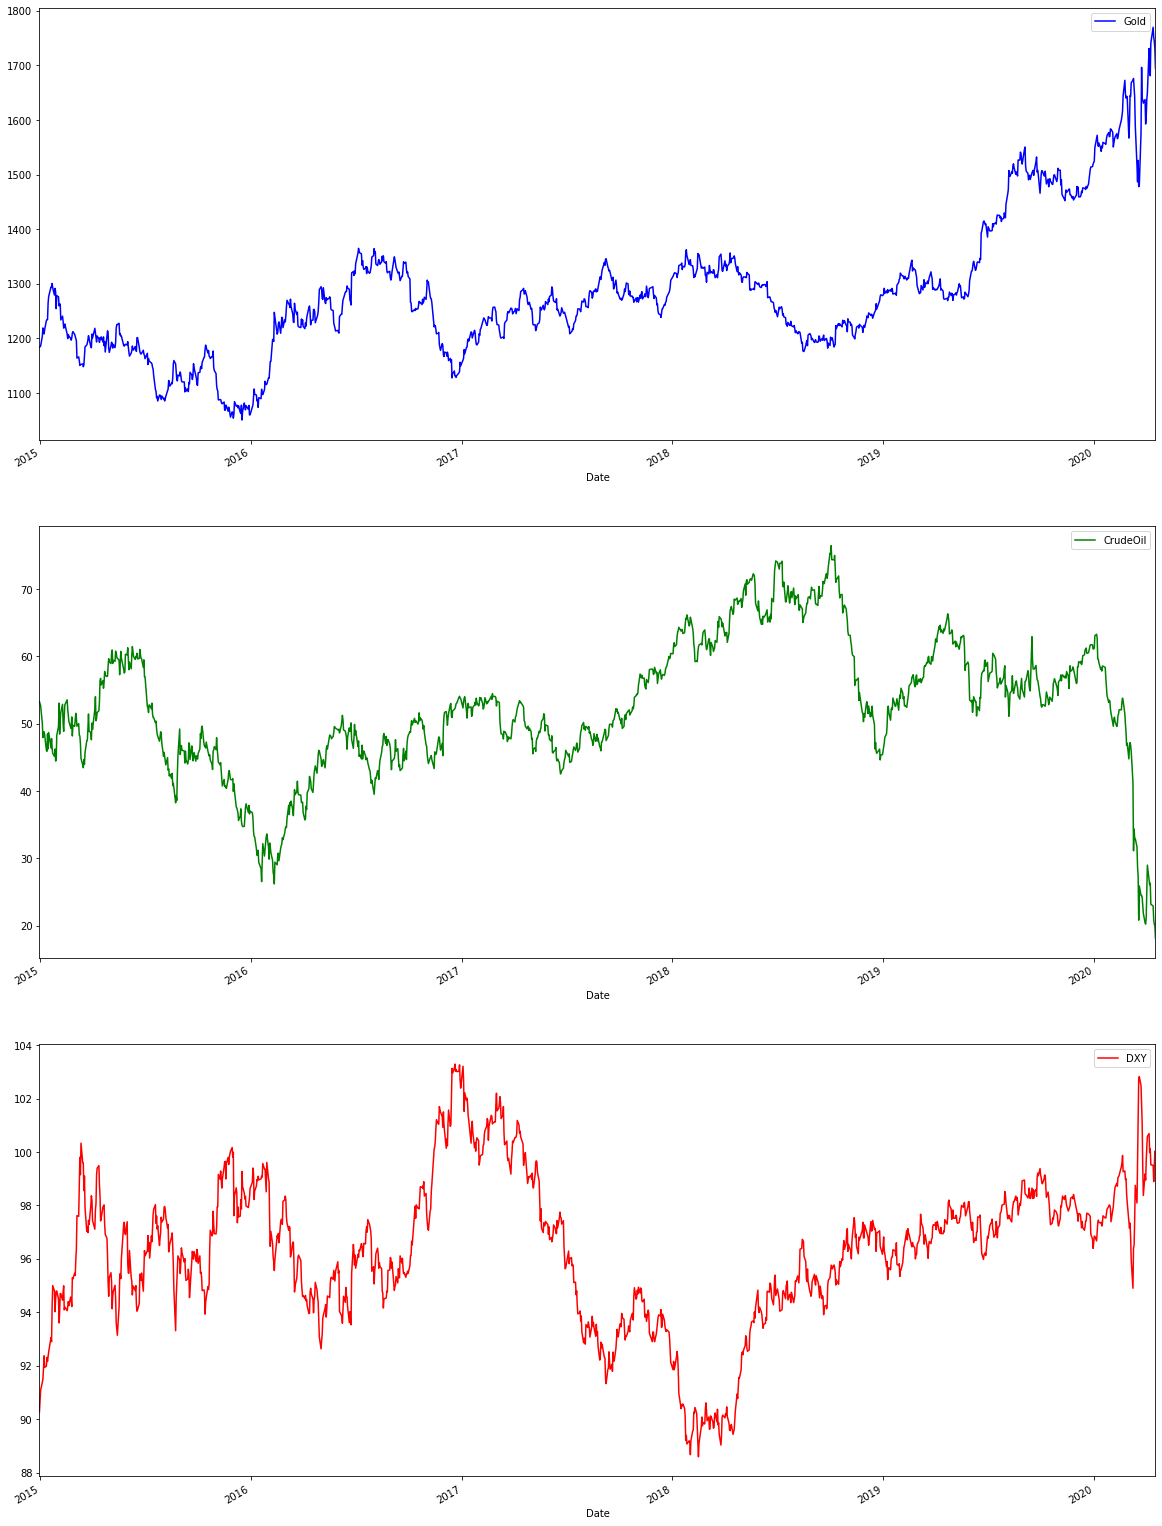

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20,30))

## Plot actual prices against Date
dataset = dataset.dropna()
dataset[['Gold']].plot(ax=ax1, color='b')
dataset[['CrudeOil']].plot(ax=ax2, color='g') 
dataset[['DXY']].plot(ax=ax3, color='r') 

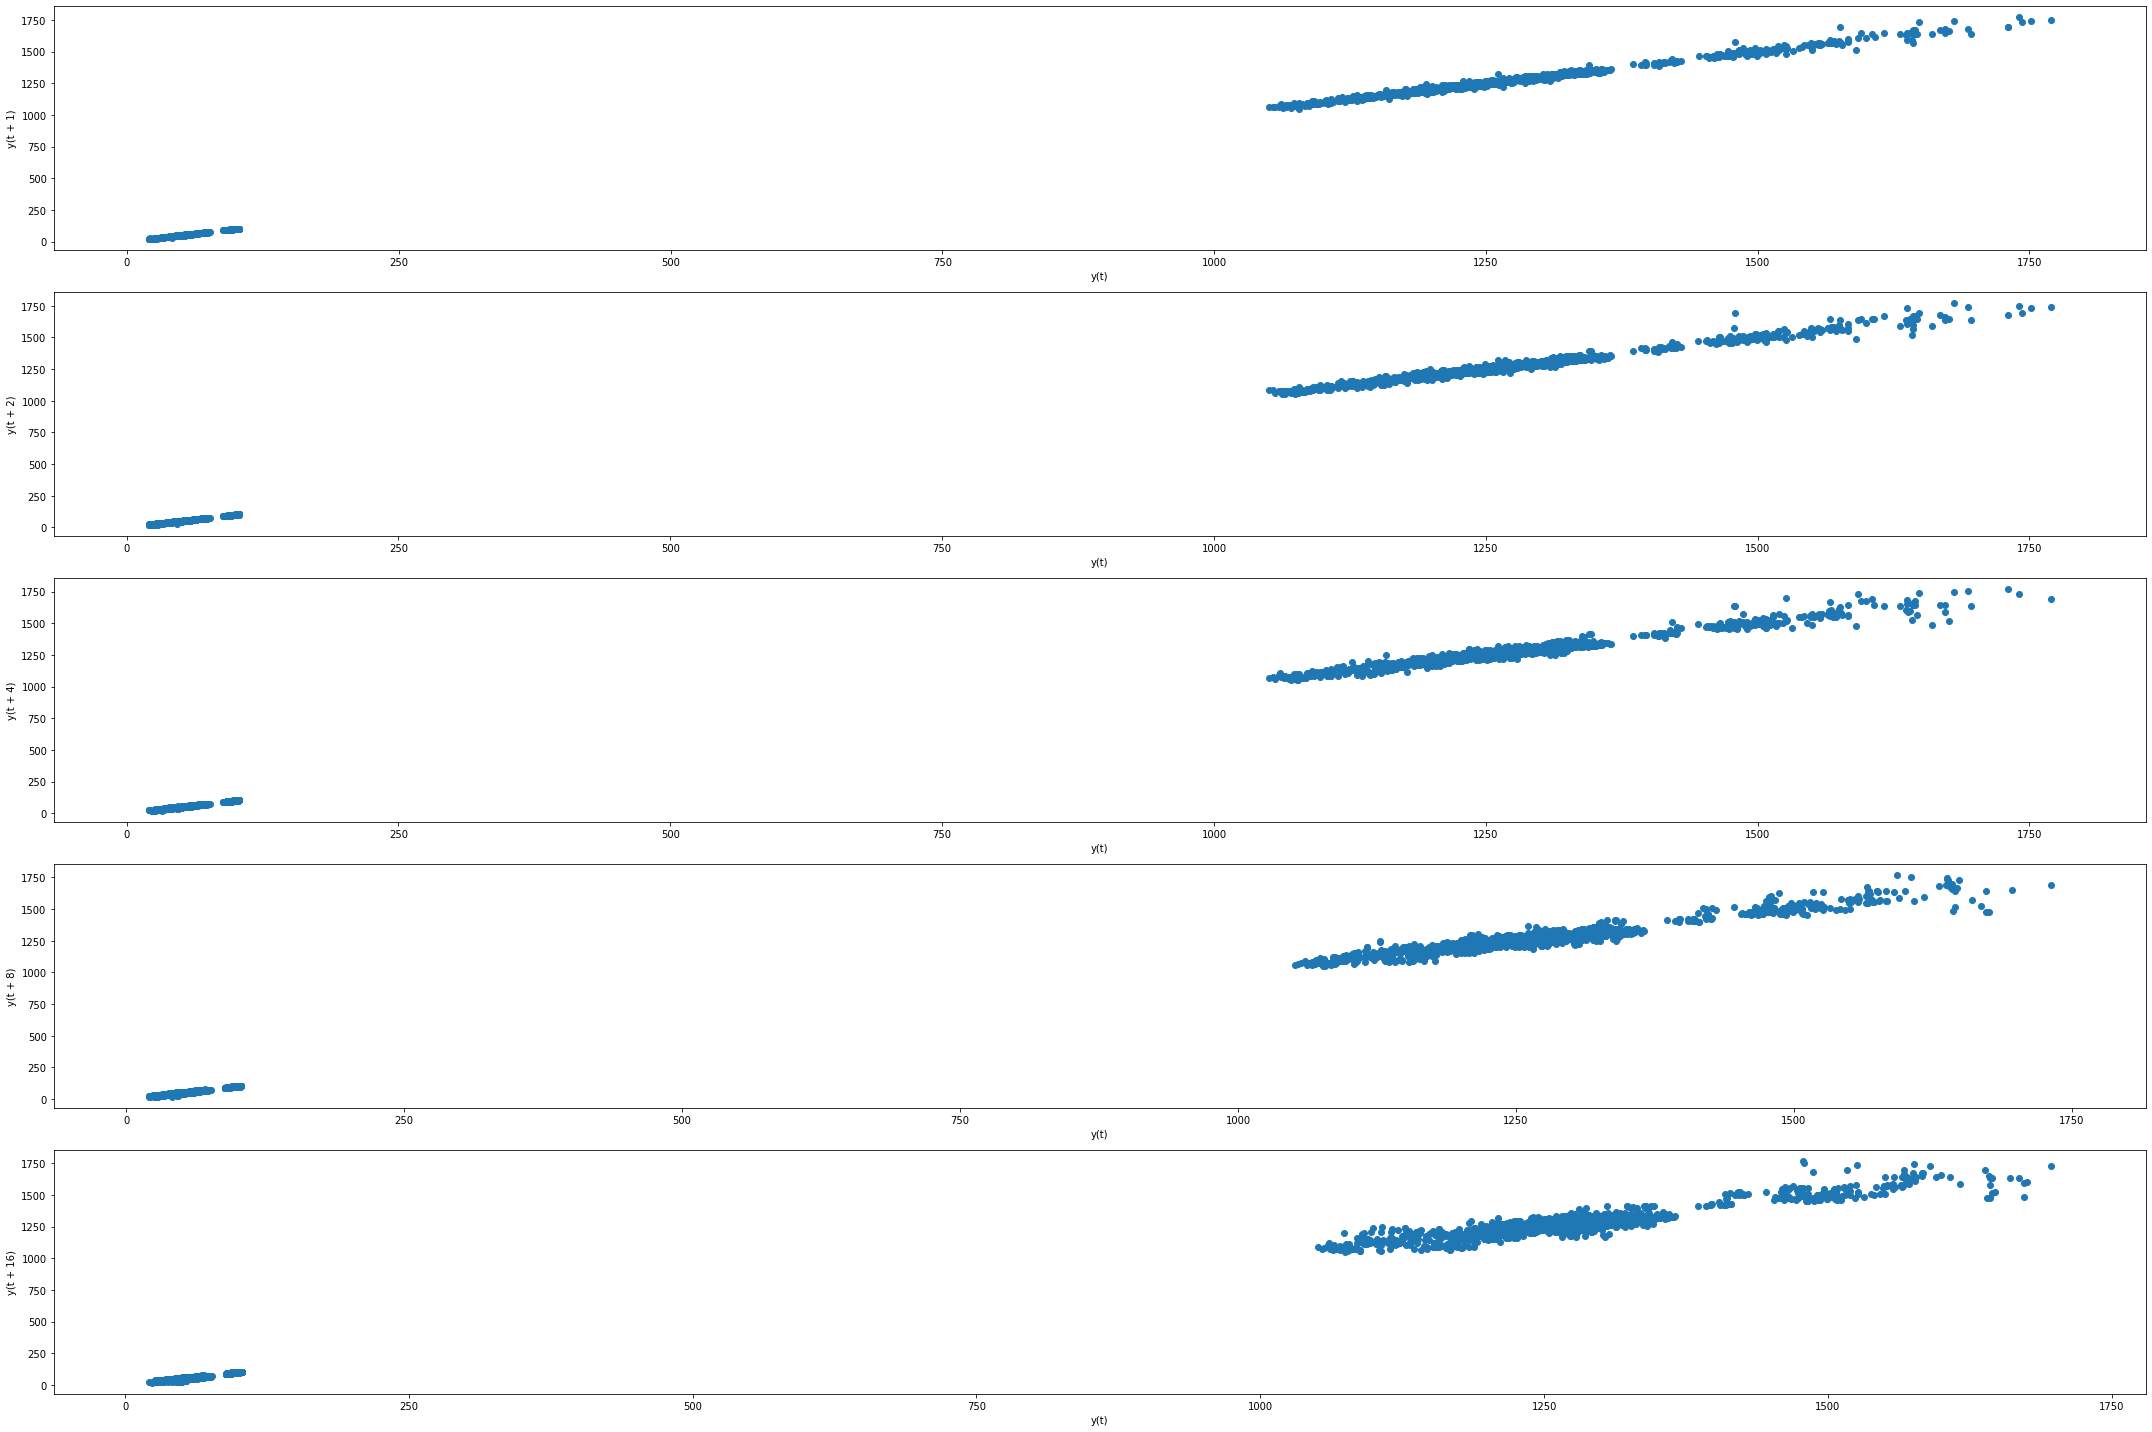

In [11]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(30,20))

## Lags 1,2,4,8,16
count = 1
for i in axs:
    pd.plotting.lag_plot(dataset, lag=count, ax=i)
    count *= 2

plt.tight_layout()

## Autocorrelation Check

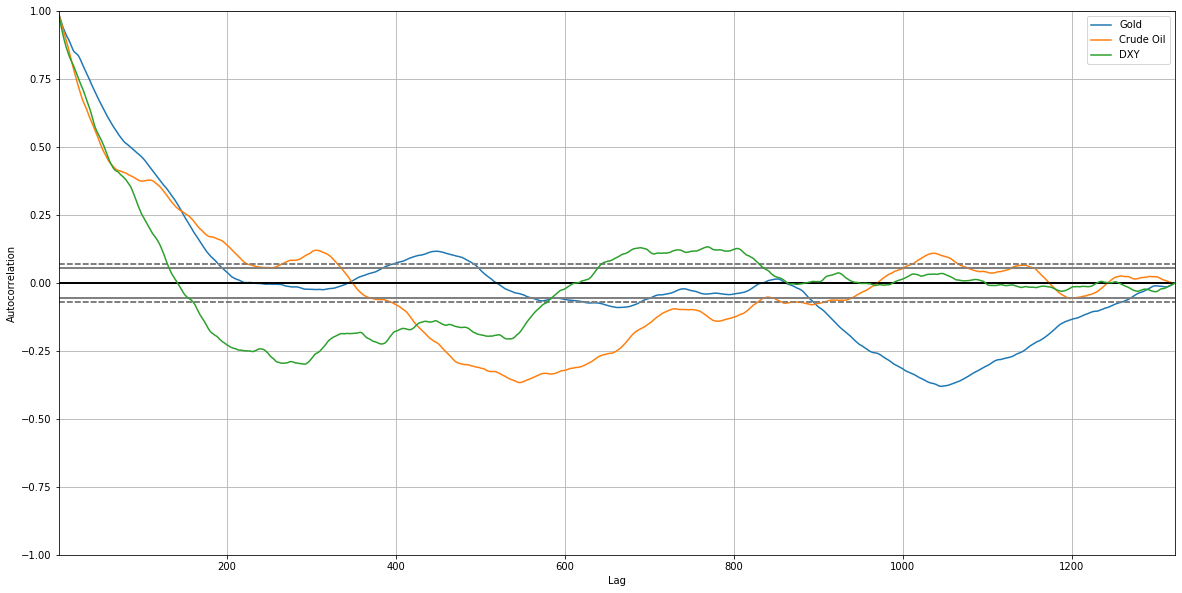

In [12]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(dataset.Gold, label='Gold')
pd.plotting.autocorrelation_plot(dataset.CrudeOil, label='Crude Oil')
pd.plotting.autocorrelation_plot(dataset.DXY, label='DXY')

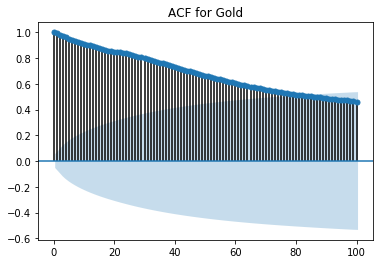

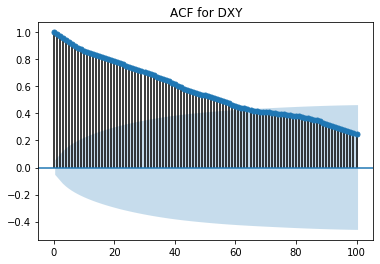

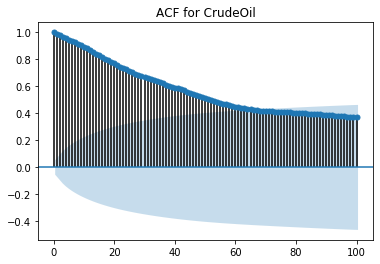

In [13]:
for i in dataset:
    sm.graphics.tsa.plot_acf(dataset[i].values.squeeze(), lags=100)
    plt.title(f'ACF for {i}')
    
## Looks very much like a AR model for each of them

## Stationary Check

In [14]:
def ADF_Test(series, name=''):
    
    ## Select ADFuller Lags based off AIC criterion
    res = smt.adfuller(series, autolag='AIC')
    
    ## Map to a dictionary format
    output = {'Test Statistic': res[0], 'P-Value': res[1], 'Lags':res[2], 'Observations':res[3]}
    
    pval = output['P-Value']
    
    print(f'Augmented Dickey-Fuller Test on {name}')
    print('-'*50)
    print(f"\nCritical Values:\t{res[4]['1%']:.4f} (1%), {res[4]['5%']:.4f} (5%), {res[4]['10%']:.4f} (10%)")
    print("\nNull Hypothesis:\tThe process contains a unit root.")
    print("Alternative Hypothesis:\tThe process is weakly stationary.")
    
    print(f"\n\nTest Statistic\t\t= {output['Test Statistic']:.4f}")
    print(f"No of Lags Chosen\t= {output['Lags']}")
    print(f"\nP-Value\t\t\t= {output['P-Value']:.4f}")
          
    statD = {True:'Stationary', False:'Non-Stationary'}

    print(f"Is Stationary?\t\t{statD[pval <= 0.01]} (1%), {statD[pval <= 0.05]} (5%), {statD[pval <= 0.10]} (10%)")

In [15]:
for name, column in dataset.iteritems():
    ADF_Test(column, name=column.name)
    print('\n')

Augmented Dickey-Fuller Test on Gold
--------------------------------------------------

Critical Values:	-3.4354 (1%), -2.8638 (5%), -2.5680 (10%)

Null Hypothesis:	The process contains a unit root.
Alternative Hypothesis:	The process is weakly stationary.


Test Statistic		= 0.3317
No of Lags Chosen	= 16

P-Value			= 0.9788
Is Stationary?		Non-Stationary (1%), Non-Stationary (5%), Non-Stationary (10%)


Augmented Dickey-Fuller Test on DXY
--------------------------------------------------

Critical Values:	-3.4354 (1%), -2.8638 (5%), -2.5679 (10%)

Null Hypothesis:	The process contains a unit root.
Alternative Hypothesis:	The process is weakly stationary.


Test Statistic		= -2.3889
No of Lags Chosen	= 13

P-Value			= 0.1449
Is Stationary?		Non-Stationary (1%), Non-Stationary (5%), Non-Stationary (10%)


Augmented Dickey-Fuller Test on CrudeOil
--------------------------------------------------

Critical Values:	-3.4353 (1%), -2.8637 (5%), -2.5679 (10%)

Null Hypothesis:	The process 

## Filter for pre-COVID data to check if forecast is accurate

In [16]:
## Filter pre-COVID dataset for training purposes
X_train = dataset.loc['2015-01-01':'2020-02-28']

## Post-COVID dataset for forecast (validation) purposes
X_valid = dataset.loc['2020-02-28':]

In [17]:
X_train.head()

,Gold,DXY,CrudeOil
Date,,,
2015-01-02,1186.000000,91.080002,52.689999
2015-01-05,1203.900024,91.379997,50.040001
2015-01-06,1219.300049,91.500000,47.930000
2015-01-07,1210.599976,91.889999,48.650002
2015-01-08,1208.400024,92.370003,48.790001


In [18]:
X_valid.head()

,Gold,DXY,CrudeOil
Date,,,
2020-02-28,1642.500000,98.129997,47.090000
2020-03-02,1566.699951,97.360001,44.759998
2020-03-03,1594.800049,97.150002,46.750000
2020-03-04,1644.400024,97.339996,47.180000
2020-03-05,1643.000000,96.820000,46.779999


# Run difference on X_train

In [19]:
X_train = X_train.diff().dropna()

In [20]:
X_valid = X_valid.diff().dropna()

## Differencing of Prices and Check Dataset

In [21]:
X_train.head()

,Gold,DXY,CrudeOil
Date,,,
2015-01-05,17.900024,0.299995,-2.649998
2015-01-06,15.400024,0.120003,-2.110001
2015-01-07,-8.700073,0.389999,0.720001
2015-01-08,-2.199951,0.480003,0.139999
2015-01-09,7.599976,-0.430000,-0.430000


In [22]:
X_train.describe()

,Gold,DXY,CrudeOil
count,1286.000000,1286.000000,1286.000000
mean,0.354977,0.005482,-0.004355
std,10.304586,0.412148,1.160378
min,-44.300049,-2.369995,-4.630001
25%,-5.099976,-0.230003,-0.677501
50%,0.150024,0.010002,0.059998
75%,5.800049,0.239998,0.677501
max,58.800049,1.919998,8.050003


In [23]:
X_valid.head()

,Gold,DXY,CrudeOil
Date,,,
2020-03-02,-75.800049,-0.769997,-2.330002
2020-03-03,28.100098,-0.209999,1.990002
2020-03-04,49.599976,0.189995,0.430000
2020-03-05,-1.400024,-0.519997,-0.400002
2020-03-06,25.000000,-0.870003,-0.879997


In [24]:
X_valid.describe()

,Gold,DXY,CrudeOil
count,34.000000,34.000000,34.000000
mean,1.529412,0.048529,-0.852059
std,45.420634,0.849664,2.833334
min,-75.800049,-1.630005,-10.150000
25%,-27.174957,-0.647503,-1.727500
50%,-1.450012,0.020000,-0.799998
75%,27.325073,0.570000,-0.012500
max,120.400024,1.599998,5.080000


## Plot (Differenced) Dataset over Time

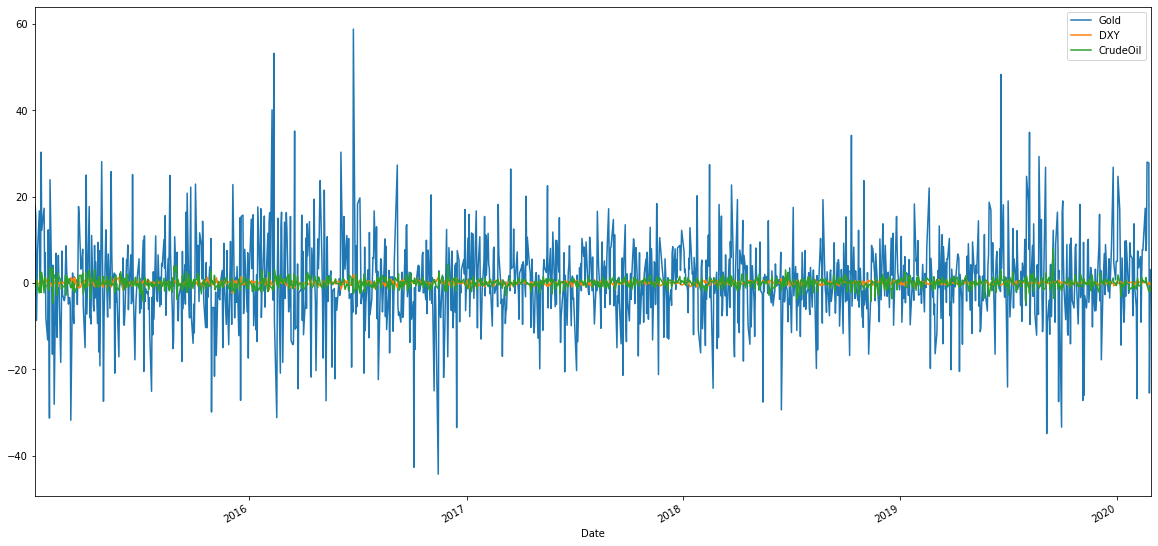

In [25]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

## Plot differenced prices against Date
X_train.plot(ax=ax1) 

## PACF/ACF Functions

In [26]:
def plot_ACF_PACF(series, name='', significance=0.05):
    
    fig = plt.figure(figsize=(30,10))

    confid_label = ['Lower Confidence', 'Upper Confidence']

    ax1 = fig.add_subplot(211)
    acf = sm.tsa.stattools.acf(series, alpha=significance)
    acf = pd.concat([pd.DataFrame(acf[0], columns=['ACF']), pd.DataFrame(acf[1], columns=confid_label)], axis=1)
    fig1 = acf['ACF'][1:].plot(kind='bar', title=f'{name} Differenced Autocorrelations', figsize=(16,7), ax=ax1)
    fig1 = fig1.plot(acf[1:][confid_label], label=confid_label)

    ax2 = fig.add_subplot(212)
    pacf = sm.tsa.stattools.pacf(series, alpha=significance)
    pacf = pd.concat([pd.DataFrame(pacf[0], columns=['PACF']), pd.DataFrame(pacf[1], columns=confid_label)], axis=1)
    fig2 = pacf['PACF'][1:].plot(kind='bar', title=f'{name} Differenced Partial Autocorrelations', figsize=(16,7), ax=ax2)
    fig2 = fig2.plot(pacf[1:][confid_label], label=confid_label)

    plt.tight_layout()

## Differenced SLV's PACF and ACF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


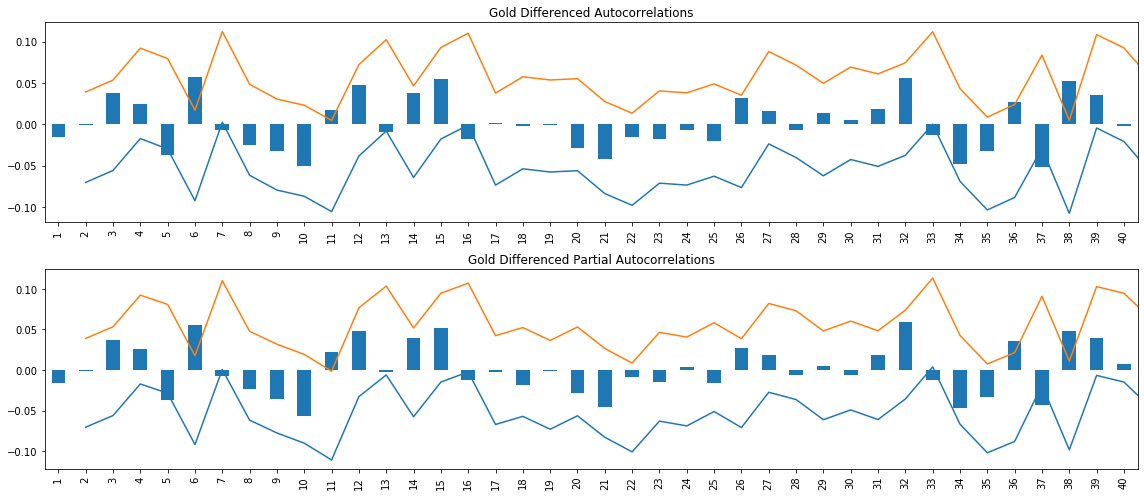

In [27]:
plot_ACF_PACF(X_train.Gold, name='Gold')

## Differenced Crude Oil's PACF and ACF

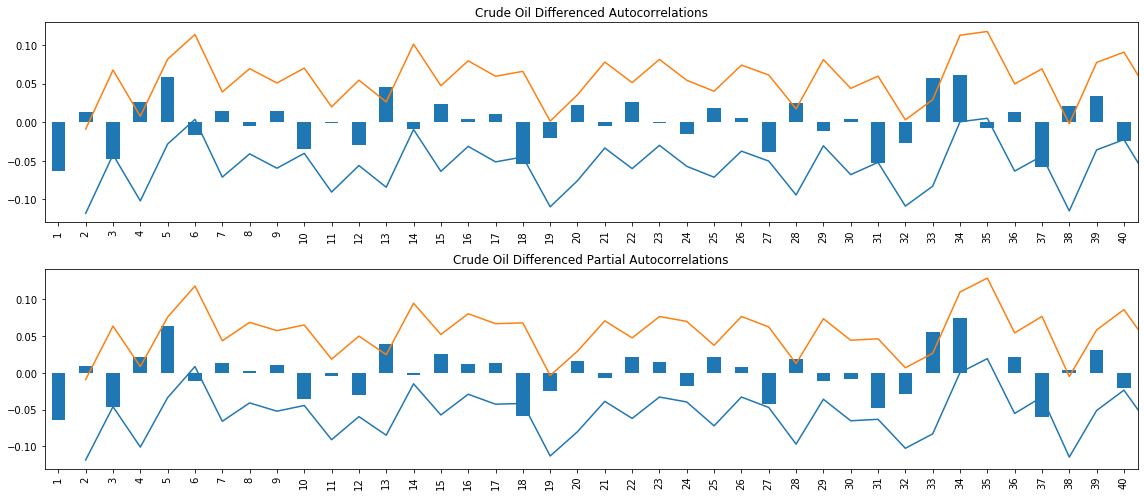

In [28]:
plot_ACF_PACF(X_train.CrudeOil, name='Crude Oil')

## Differenced DXY's PACF and ACF

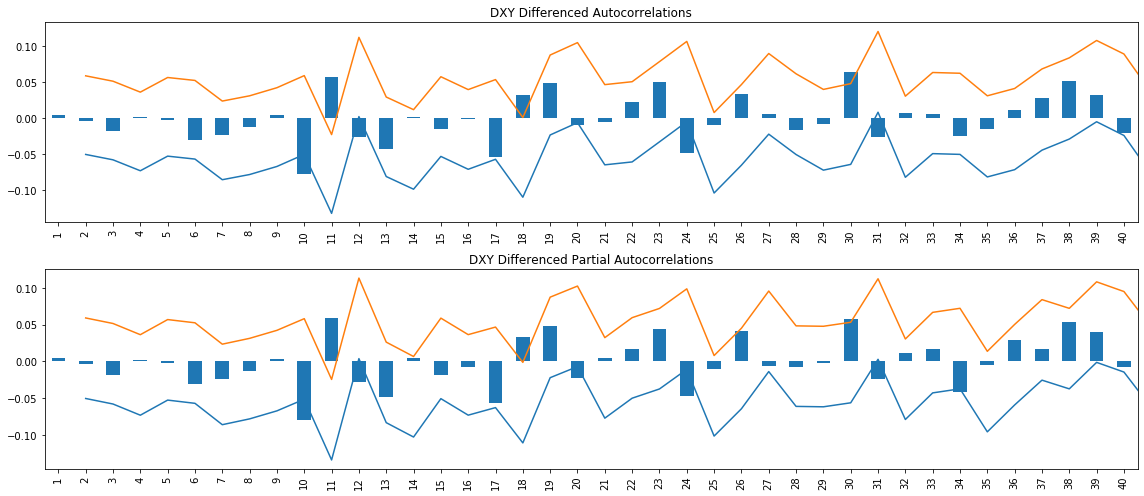

In [29]:
plot_ACF_PACF(X_train.DXY, name='DXY')

## Stationary Check on Differenced Variable

In [30]:
for name, column in X_train.iteritems():
    ADF_Test(column, name=column.name)
    print('\n')

Augmented Dickey-Fuller Test on Gold
--------------------------------------------------

Critical Values:	-3.4354 (1%), -2.8638 (5%), -2.5680 (10%)

Null Hypothesis:	The process contains a unit root.
Alternative Hypothesis:	The process is weakly stationary.


Test Statistic		= -36.4287
No of Lags Chosen	= 0

P-Value			= 0.0000
Is Stationary?		Stationary (1%), Stationary (5%), Stationary (10%)


Augmented Dickey-Fuller Test on DXY
--------------------------------------------------

Critical Values:	-3.4354 (1%), -2.8638 (5%), -2.5680 (10%)

Null Hypothesis:	The process contains a unit root.
Alternative Hypothesis:	The process is weakly stationary.


Test Statistic		= -35.6592
No of Lags Chosen	= 0

P-Value			= 0.0000
Is Stationary?		Stationary (1%), Stationary (5%), Stationary (10%)


Augmented Dickey-Fuller Test on CrudeOil
--------------------------------------------------

Critical Values:	-3.4354 (1%), -2.8638 (5%), -2.5680 (10%)

Null Hypothesis:	The process contains a unit root.
A

## Granger Causality Checks

Can find that for all 15 lags at 5% significance level

1) Gold 'Granger-causes' CrudeOil and vice versa 

2) DXY 'Granger-causes' CrudeOil, but CrudeOil only 'Granger-causes' DXY to a moderate extent

3) Gold 'Granger-causes' DXY more than DXY "Granger-causes" Gold 

**Justify use of VAR cause of the multi time-series with lags interaction to forecast**

In [31]:
sms.grangercausalitytests(X_train[['Gold','CrudeOil']], maxlag=15, addconst=True);

## Cannot reject null hypothesis at all 15 lags at 10% significance level
## which means CrudeOil 'Granger-causes' Gold 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5572  , p=0.4555  , df_denom=1282, df_num=1
ssr based chi2 test:   chi2=0.5585  , p=0.4549  , df=1
likelihood ratio test: chi2=0.5584  , p=0.4549  , df=1
parameter F test:         F=0.5572  , p=0.4555  , df_denom=1282, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4649  , p=0.2315  , df_denom=1279, df_num=2
ssr based chi2 test:   chi2=2.9413  , p=0.2298  , df=2
likelihood ratio test: chi2=2.9380  , p=0.2302  , df=2
parameter F test:         F=1.4649  , p=0.2315  , df_denom=1279, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0712  , p=0.3602  , df_denom=1276, df_num=3
ssr based chi2 test:   chi2=3.2314  , p=0.3573  , df=3
likelihood ratio test: chi2=3.2273  , p=0.3579  , df=3
parameter F test:         F=1.0712  , p=0.3602  , df_denom=1276, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1031  , p=0.

In [32]:
sms.grangercausalitytests(X_train[['CrudeOil','Gold']], maxlag=15, addconst=True);

## Cannot reject null hypothesis for all 15 lags at 10% significance level
## which means Gold 'Granger-causes' CrudeOil 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0388  , p=0.8439  , df_denom=1282, df_num=1
ssr based chi2 test:   chi2=0.0389  , p=0.8437  , df=1
likelihood ratio test: chi2=0.0389  , p=0.8437  , df=1
parameter F test:         F=0.0388  , p=0.8439  , df_denom=1282, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3209  , p=0.7256  , df_denom=1279, df_num=2
ssr based chi2 test:   chi2=0.6443  , p=0.7246  , df=2
likelihood ratio test: chi2=0.6441  , p=0.7247  , df=2
parameter F test:         F=0.3209  , p=0.7256  , df_denom=1279, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2772  , p=0.8419  , df_denom=1276, df_num=3
ssr based chi2 test:   chi2=0.8361  , p=0.8408  , df=3
likelihood ratio test: chi2=0.8359  , p=0.8409  , df=3
parameter F test:         F=0.2772  , p=0.8419  , df_denom=1276, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5766  , p=0.

In [33]:
sms.grangercausalitytests(X_train[['CrudeOil','DXY']], maxlag=15, addconst=True);

## Cannot reject null hypothesis for all 15 lags at 10% significance level, which means DXY 'Granger-Cause' CrudeOil 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0055  , p=0.9409  , df_denom=1282, df_num=1
ssr based chi2 test:   chi2=0.0055  , p=0.9408  , df=1
likelihood ratio test: chi2=0.0055  , p=0.9408  , df=1
parameter F test:         F=0.0055  , p=0.9409  , df_denom=1282, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0380  , p=0.9628  , df_denom=1279, df_num=2
ssr based chi2 test:   chi2=0.0762  , p=0.9626  , df=2
likelihood ratio test: chi2=0.0762  , p=0.9626  , df=2
parameter F test:         F=0.0380  , p=0.9628  , df_denom=1279, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0490  , p=0.9857  , df_denom=1276, df_num=3
ssr based chi2 test:   chi2=0.1477  , p=0.9856  , df=3
likelihood ratio test: chi2=0.1477  , p=0.9856  , df=3
parameter F test:         F=0.0490  , p=0.9857  , df_denom=1276, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3103  , p=0.

In [34]:
sms.grangercausalitytests(X_train[['DXY','CrudeOil']], maxlag=15, addconst=True);

## Can reject null hypothesis at quite some bit of lags at 10% significance level
## The rejection of null hypothesis suggests CrudeOil does not "Granger-causes" DXY


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8062  , p=0.0941  , df_denom=1282, df_num=1
ssr based chi2 test:   chi2=2.8128  , p=0.0935  , df=1
likelihood ratio test: chi2=2.8097  , p=0.0937  , df=1
parameter F test:         F=2.8062  , p=0.0941  , df_denom=1282, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9436  , p=0.0530  , df_denom=1279, df_num=2
ssr based chi2 test:   chi2=5.9102  , p=0.0521  , df=2
likelihood ratio test: chi2=5.8967  , p=0.0524  , df=2
parameter F test:         F=2.9436  , p=0.0530  , df_denom=1279, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7664  , p=0.0406  , df_denom=1276, df_num=3
ssr based chi2 test:   chi2=8.3447  , p=0.0394  , df=3
likelihood ratio test: chi2=8.3177  , p=0.0399  , df=3
parameter F test:         F=2.7664  , p=0.0406  , df_denom=1276, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2202  , p=0.

In [35]:
sms.grangercausalitytests(X_train[['Gold','DXY']], maxlag=15, addconst=True);

## Can reject null hypothesis at quite some bit of lags at 10% significance level
## The rejection of null hypothesis suggests DXY does not "Granger-causes" Gold


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.0100  , p=0.0144  , df_denom=1282, df_num=1
ssr based chi2 test:   chi2=6.0241  , p=0.0141  , df=1
likelihood ratio test: chi2=6.0100  , p=0.0142  , df=1
parameter F test:         F=6.0100  , p=0.0144  , df_denom=1282, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1976  , p=0.0412  , df_denom=1279, df_num=2
ssr based chi2 test:   chi2=6.4201  , p=0.0404  , df=2
likelihood ratio test: chi2=6.4041  , p=0.0407  , df=2
parameter F test:         F=3.1976  , p=0.0412  , df_denom=1279, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9125  , p=0.0334  , df_denom=1276, df_num=3
ssr based chi2 test:   chi2=8.7854  , p=0.0323  , df=3
likelihood ratio test: chi2=8.7554  , p=0.0327  , df=3
parameter F test:         F=2.9125  , p=0.0334  , df_denom=1276, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2643  , p=0.

In [36]:
sms.grangercausalitytests(X_train[['DXY','Gold']], maxlag=15, addconst=True);

## Can reject null hypothesis at past lag 9 at 10% significance level
## The rejection of null hypothesis suggests Gold does "Granger-causes" DXY to some extent 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4919  , p=0.4832  , df_denom=1282, df_num=1
ssr based chi2 test:   chi2=0.4930  , p=0.4826  , df=1
likelihood ratio test: chi2=0.4929  , p=0.4826  , df=1
parameter F test:         F=0.4919  , p=0.4832  , df_denom=1282, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3963  , p=0.2479  , df_denom=1279, df_num=2
ssr based chi2 test:   chi2=2.8035  , p=0.2462  , df=2
likelihood ratio test: chi2=2.8005  , p=0.2465  , df=2
parameter F test:         F=1.3963  , p=0.2479  , df_denom=1279, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1320  , p=0.3349  , df_denom=1276, df_num=3
ssr based chi2 test:   chi2=3.4146  , p=0.3320  , df=3
likelihood ratio test: chi2=3.4100  , p=0.3326  , df=3
parameter F test:         F=1.1320  , p=0.3349  , df_denom=1276, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4971  , p=0.

## Implement VAR Model

In [37]:
model = smt.VAR(X_train)

model_op = model.fit(maxlags=15, ic='aic')

print(model_op.summary());

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 01, May, 2020
Time:                     13:59:52
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    3.04711
Nobs:                     1285.00    HQIC:                   3.01702
Log likelihood:          -7384.82    FPE:                    20.0642
AIC:                      2.99894    Det(Omega_mle):         19.8780
--------------------------------------------------------------------
Results for equation Gold
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.368466         0.287153            1.283           0.199
L1.Gold            -0.045416         0.030379           -1.495           0.135
L1.DXY             -1.821671         0.764179           -2.384       

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


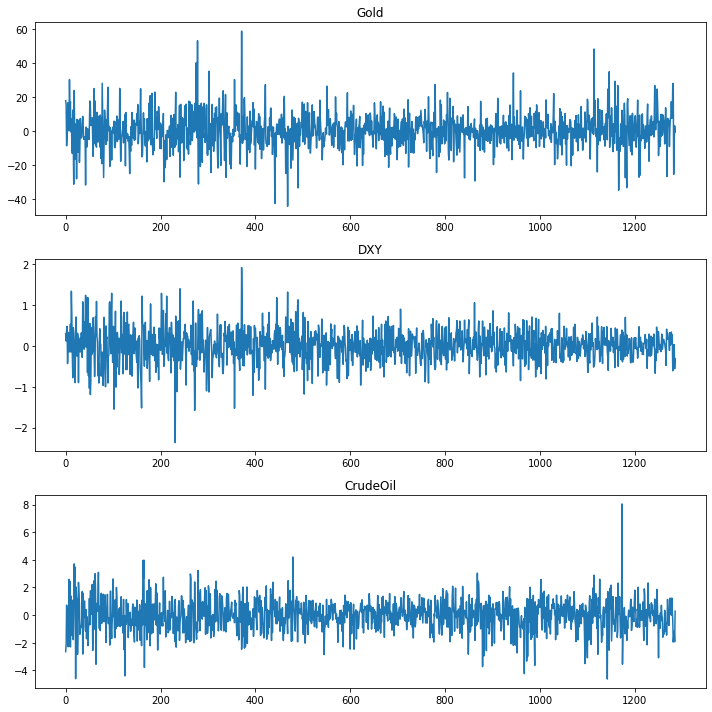

In [38]:
model_op.plot();
plt.tight_layout()

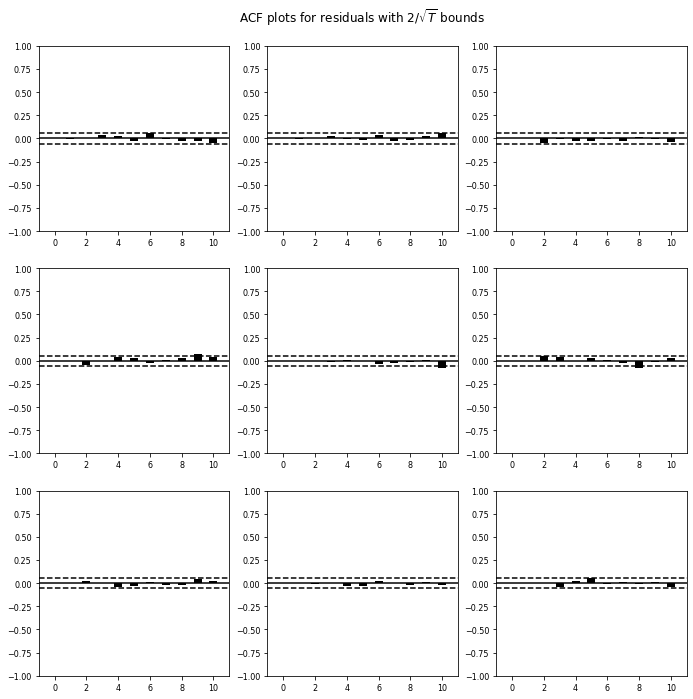

In [39]:
model_op.plot_acorr();

## Impulse Response 

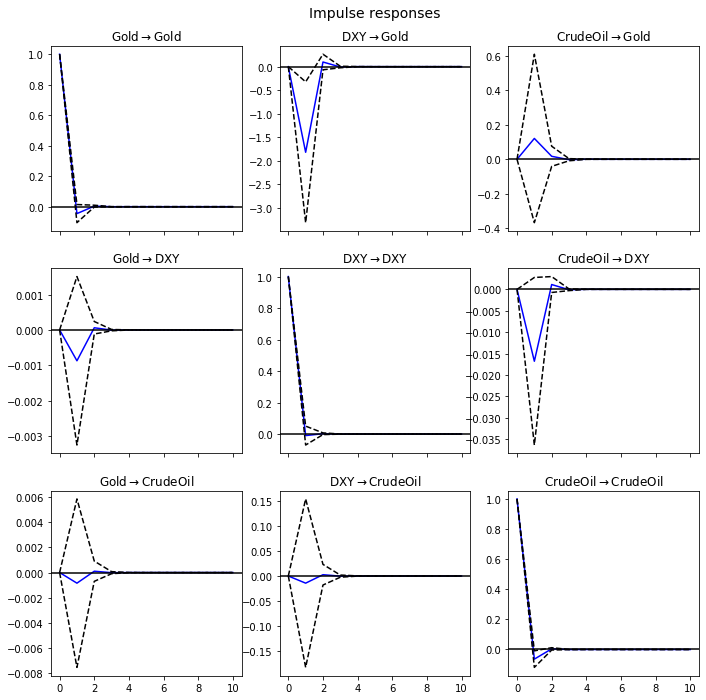

In [40]:
irf = model_op.irf(10)
irf.plot(orth=False);

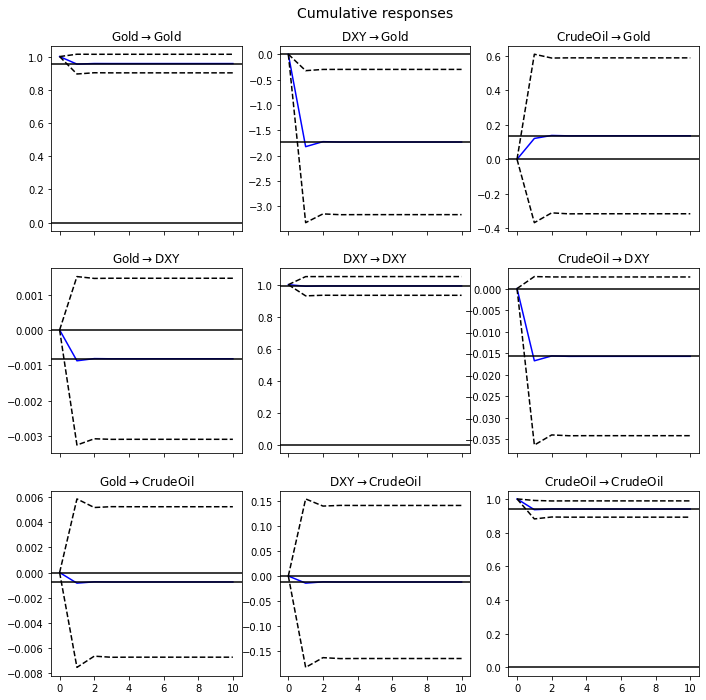

In [41]:
irf.plot_cum_effects(orth=False);

## Variance Decomposition

In [42]:
fevd = model_op.fevd(5)
fevd.summary()

FEVD for Gold
         Gold       DXY  CrudeOil
0    1.000000  0.000000  0.000000
1    0.995176  0.004642  0.000181
2    0.995161  0.004654  0.000185
3    0.995161  0.004654  0.000185
4    0.995161  0.004654  0.000185

FEVD for DXY
         Gold       DXY  CrudeOil
0    0.162541  0.837459  0.000000
1    0.162513  0.835304  0.002183
2    0.162512  0.835296  0.002193
3    0.162512  0.835296  0.002193
4    0.162512  0.835296  0.002193

FEVD for CrudeOil
         Gold       DXY  CrudeOil
0    0.001697  0.011941  0.986362
1    0.001755  0.011898  0.986347
2    0.001756  0.011898  0.986346
3    0.001756  0.011898  0.986346
4    0.001756  0.011898  0.986346




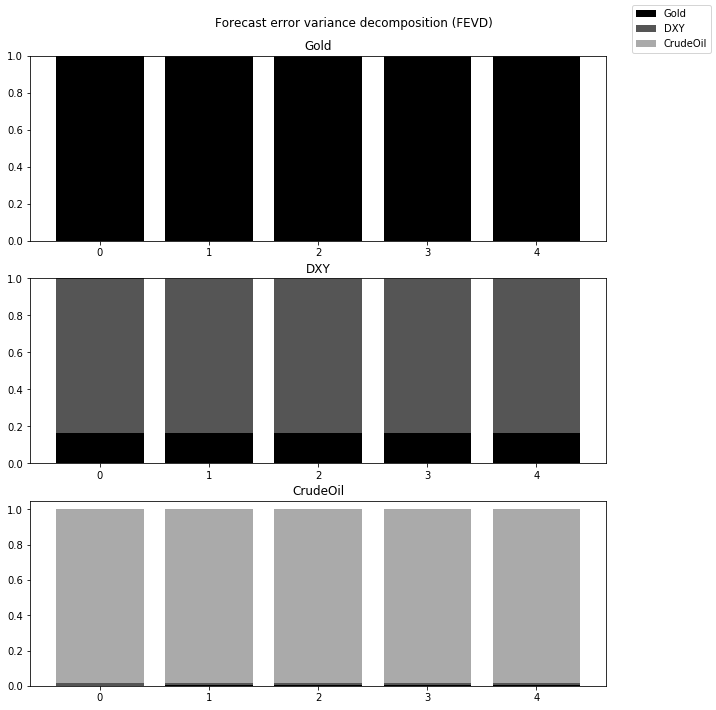

In [43]:
fevd.plot(5);

## Forecast VAR Model Using Validation Set

In [44]:
pred = model_op.forecast(X_train.values,len(X_valid))
pred_df = pd.DataFrame(pred, index=X_valid.index[-len(X_valid):], columns=X_valid.columns)
pred_df

,Gold,DXY,CrudeOil
Date,,,
2020-03-02,0.995459,0.004208,-0.015788
2020-03-03,0.313684,0.004896,-0.002098
2020-03-04,0.345046,0.005256,-0.002407
2020-03-05,0.342930,0.005230,-0.002419
2020-03-06,0.343071,0.005233,-0.002416
2020-03-09,0.343061,0.005232,-0.002416
2020-03-10,0.343062,0.005232,-0.002416
2020-03-11,0.343062,0.005232,-0.002416
2020-03-12,0.343062,0.005232,-0.002416


In [45]:
valid_predpx = dataset.loc['2020-03-01':].iloc[0] + pred_df.cumsum()
valid_actualpx = dataset.loc['2020-03-01':]

## Rename columns
valid_predpx = valid_predpx.rename(columns={"Gold": "Gold_Pred", "CrudeOil": "CrudeOil_Pred", "DXY": "DXY_Pred"})
valid_actualpx = valid_actualpx.rename(columns={"Gold": "Gold_Actual", "CrudeOil": "CrudeOil_Actual", "DXY": "DXY_Actual"})

## Join the two for plotting purposes
validSet = pd.concat([valid_actualpx, valid_predpx], axis=1)

validSet

,Gold_Actual,DXY_Actual,CrudeOil_Actual,Gold_Pred,DXY_Pred,CrudeOil_Pred
Date,,,,,,
2020-03-02,1566.699951,97.360001,44.759998,1567.695410,97.364209,44.744210
2020-03-03,1594.800049,97.150002,46.750000,1568.009094,97.369105,44.742112
2020-03-04,1644.400024,97.339996,47.180000,1568.354141,97.374361,44.739705
2020-03-05,1643.000000,96.820000,46.779999,1568.697070,97.379591,44.737286
2020-03-06,1668.000000,95.949997,45.900002,1569.040141,97.384824,44.734870
2020-03-09,1672.400024,94.900002,41.279999,1569.383202,97.390056,44.732454
2020-03-10,1675.699951,96.410004,31.129999,1569.726264,97.395289,44.730037
2020-03-11,1660.300049,96.510002,34.360001,1570.069325,97.400521,44.727621
2020-03-12,1642.300049,97.470001,32.980000,1570.412387,97.405754,44.725204


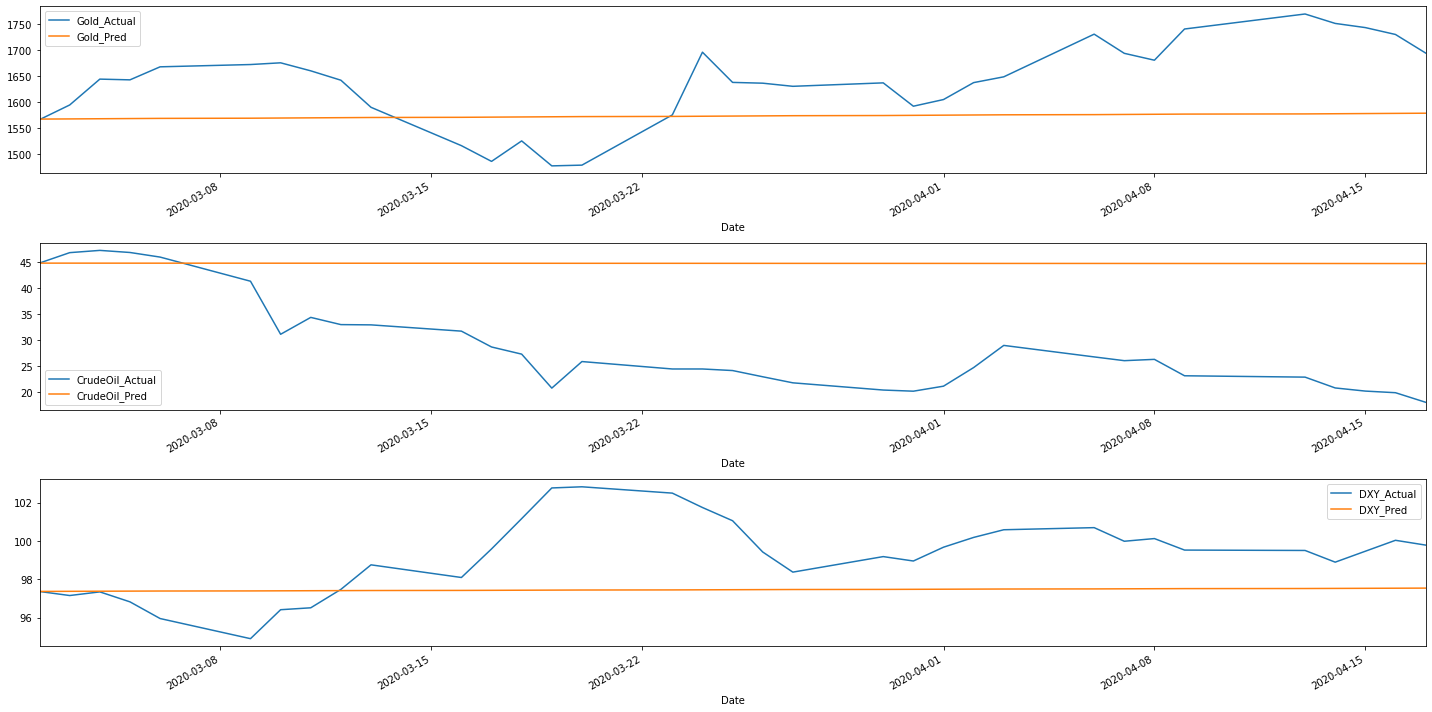

In [46]:
## Create three separate plots, one for each
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20,10))

validSet[['Gold_Actual', 'Gold_Pred']].plot(ax=ax1)
validSet[['CrudeOil_Actual', 'CrudeOil_Pred']].plot(ax=ax2)
validSet[['DXY_Actual', 'DXY_Pred']].plot(ax=ax3)

plt.tight_layout()

## Forecast Evaluation

In [47]:
def gen_forecast_error(actual, pred, name=''):
    forecast_errs = actual - pred 
    
    ## Calculate Bias
    print(f'\n{name} Bias: {sum(forecast_errs)/len(forecast_errs):.4f}')
    
    ## Calculate MAE
    mae = mean_absolute_error(actual, pred)
    print(f'{name} Mean Absolute Error: {mae:.4f}')
    
    ## Calculate MSE
    mse =  mean_squared_error(actual, pred)
    print(f'{name} Mean Squared Error: {mse:.4f}')
    
    ## Calculate RMSE
    print(f'{name} Root Mean Squared Error: {sqrt(mse):.4f}\n')

In [48]:
gen_forecast_error(validSet['Gold_Actual'], validSet['Gold_Pred'], 'Gold')


Gold Bias: 64.2297
Gold Mean Absolute Error: 86.2131
Gold Mean Squared Error: 9803.5582
Gold Root Mean Squared Error: 99.0129



In [49]:
gen_forecast_error(validSet['CrudeOil_Actual'], validSet['CrudeOil_Pred'], 'Crude Oil')


Crude Oil Bias: -15.9770
Crude Oil Mean Absolute Error: 16.4283
Crude Oil Mean Squared Error: 331.6473
Crude Oil Root Mean Squared Error: 18.2112



In [50]:
gen_forecast_error(validSet['DXY_Actual'], validSet['DXY_Pred'], 'DXY')


DXY Bias: 1.7459
DXY Mean Absolute Error: 2.1352
DXY Mean Squared Error: 6.6148
DXY Root Mean Squared Error: 2.5719

